# Predicting *colonies* with YOLOv8

* **Important**: YOLOv8 is trained using BGR. That means that when you are predicting you should *use the same image format*!

In [73]:
!pip install ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
def classify_colonies(model_path, image_path):
  model = YOLO(model_path)

  img = cv2.imread(image_path)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  H, W, _ = img.shape


  results = model(img, conf = 0.2, iou = 0.7)
  result = results[0]
  res_plotted = result.plot()

  f, axarr = plt.subplots(1,2)
  axarr[0].imshow(rgb)
  axarr[0].set_title('Photo')
  axarr[1].imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
  axarr[1].set_title('Results')

  names = results[0].names

  number_colonies = np.zeros((len(names)), dtype = int)
  for i in range(0, len(results[0])):
    box = result.boxes[i]
    class_id = int(box.cls[0].item())
    number_colonies[class_id] = number_colonies[class_id] + 1

  counting = {}
  for i in range(0, len(names)):
    bacteria_name = names.get(i)
    counting[bacteria_name] = [number_colonies[i]]

  return counting

In [41]:
model_path = '/content/drive/MyDrive/KoaBiotech/colony-counting-yolov8/runs/segment/train4/weights/last.pt'

image_path1 = '/content/drive/MyDrive/KoaBiotech/TestImages/IMG_9490_Strepto.png'
image_path2 = '/content/drive/MyDrive/KoaBiotech/TestImages/IMG_9781_Aeromonas_Blanc.png'
image_path3 = '/content/drive/MyDrive/KoaBiotech/TestImages/Sample3_TCBS_nocircles.png'
image_path4 = '/content/drive/MyDrive/KoaBiotech/TestImages/Sample5_TCBS.png'





0: 640x640 187 vharveyis, 450.6ms
Speed: 8.9ms preprocess, 450.6ms inference, 1050.0ms postprocess per image at shape (1, 3, 640, 640)


,vharveyi,vangil,valgino,assalmonicida,tmaritimum,sinniae,pdpiscicida,pddamselae
0,187,0,0,0,0,0,0,0


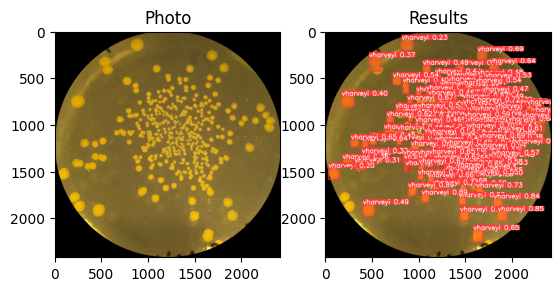

In [128]:
count = classify_colonies(model_path, image_path1)
pd.DataFrame(count)



0: 640x480 (no detections), 214.8ms
Speed: 6.0ms preprocess, 214.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


,vharveyi,vangil,valgino,assalmonicida,tmaritimum,sinniae,pdpiscicida,pddamselae
0,0,0,0,0,0,0,0,0


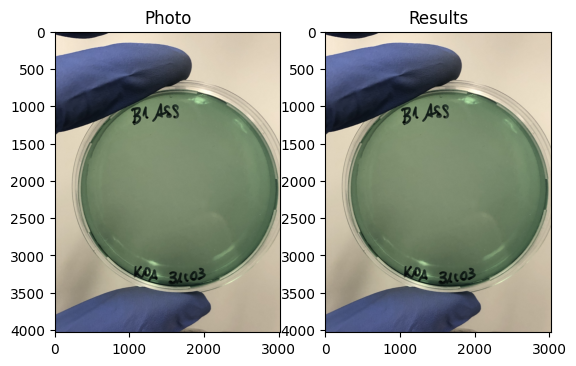

In [130]:
count = classify_colonies(model_path, image_path2)
pd.DataFrame(count)


0: 640x640 3 vharveyis, 3 valginos, 5 pddamselaes, 266.5ms
Speed: 7.7ms preprocess, 266.5ms inference, 39.6ms postprocess per image at shape (1, 3, 640, 640)


,vharveyi,vangil,valgino,assalmonicida,tmaritimum,sinniae,pdpiscicida,pddamselae
0,3,0,3,0,0,0,0,5


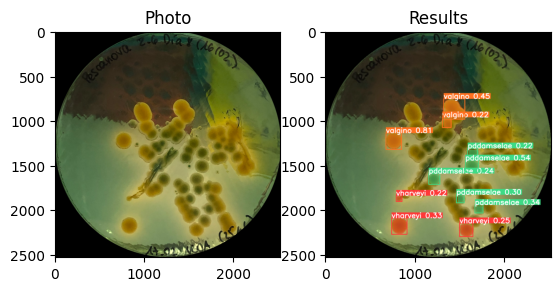

In [131]:
count = classify_colonies(model_path, image_path3)
pd.DataFrame(count)


0: 640x640 4 vharveyis, 25 valginos, 5 pddamselaes, 252.9ms
Speed: 6.0ms preprocess, 252.9ms inference, 112.3ms postprocess per image at shape (1, 3, 640, 640)


,vharveyi,vangil,valgino,assalmonicida,tmaritimum,sinniae,pdpiscicida,pddamselae
0,4,0,25,0,0,0,0,5


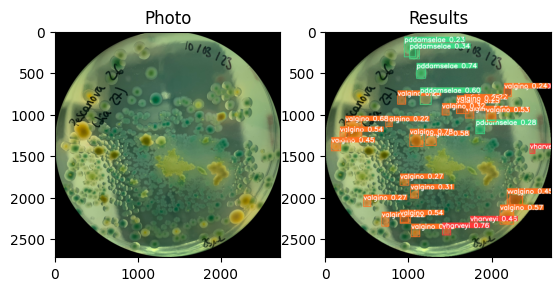

In [132]:
count = classify_colonies(model_path, image_path4)
pd.DataFrame(count)